<a href="https://colab.research.google.com/github/7Horizon/DIFA-TI/blob/main/DIFA_Technical_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mögliche ETFs für die fünf grössten Marktländern 2023 gemäss Statista:
https://www.statista.com/statistics/685925/gdp-of-european-countries/

DAX: DAXEX.SW

FTSE: ISF.SW

CAC: DX2G.DE

MIB: IMIB.MI

IBEX: EWP

# Verbindung zu Github herstellen

In [7]:
#git clone https://github.com/7Horizon/DIFA-TI.git

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Aufbereiten der Daten

In [9]:
# Liste der Tickersymbole der ETFs, die die großen europäischen Indizes abbilden
etfs = {
    "Euro Stoxx 50 ETF": "EXW1.DE",
    "FTSE 100 ETF": "ISF.L",
    "DAX ETF": "EXS1.DE",
    "CAC 40 ETF": "CAC.PA",
    "AEX ETF": "IAEX.AS",
    "IBEX 35 ETF": "EWP",
    "SMI ETF": "CSSMI.SW"
}

# Zeitperiode (letzte 10 Jahre)
start_date = "2013-09-30"
end_date = "2023-09-30"

# Hier werden die spezifischen Datenkategorien ausgewählt, in diesem Falle der Schlusskurs
data_categories = ['Adj Close']

# Daten abrufen und spezifische Kategorien auswählen
data = {}
for name, ticker in etfs.items():
    index_data = yf.download(ticker, start=start_date, end=end_date)
    data[name] = index_data[data_categories]

# Die abgerufenen Daten in ein DataFrame packen
index_data_etfs = pd.DataFrame({name: data[name]['Adj Close'] for name in etfs})

# Leere Daten im Frame auffüllen
index_data_etfs_int = index_data_etfs.interpolate();

# Performance der ETFs berechnen (prozentuale Veränderung über 10 Jahre)
performance = (index_data_etfs.iloc[-1] / index_data_etfs.iloc[0] - 1) * 100
print("Performance der ETFs über 10 Jahre:")
print(performance)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Performance der ETFs über 10 Jahre:
Euro Stoxx 50 ETF     96.440393
FTSE 100 ETF          15.571519
DAX ETF               72.037060
CAC 40 ETF           129.203896
AEX ETF              146.886324
IBEX 35 ETF           10.986588
SMI ETF               79.643617
dtype: float64


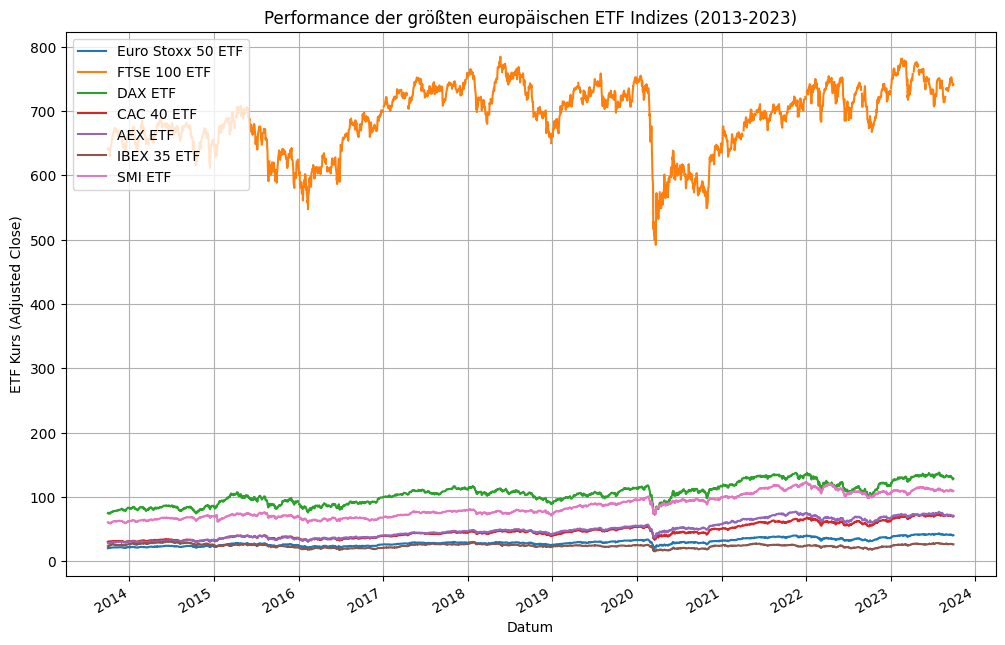

In [10]:
# Plot der ETF-Performance über die letzten 10 Jahre
index_data_etfs.plot(figsize=(12, 8), title='Performance der größten europäischen ETF Indizes (2013-2023)')
plt.xlabel("Datum")
plt.ylabel("ETF Kurs (Adjusted Close)")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

In [11]:
# Schleife durch alle ETFs und zeige die ersten 5 Zeilen für jeden ETF an
for name in etfs:
    print(f"\n{name} - Erste 5 Zeilen:")
    print(index_data_etfs[name].head())


Euro Stoxx 50 ETF - Erste 5 Zeilen:
Date
2013-09-30    20.723700
2013-10-01    20.998260
2013-10-02    20.887724
2013-10-03          NaN
2013-10-04    20.951906
Name: Euro Stoxx 50 ETF, dtype: float64

FTSE 100 ETF - Erste 5 Zeilen:
Date
2013-09-30    641.951172
2013-10-01    641.751953
2013-10-02    639.461731
2013-10-03    640.158936
2013-10-04    640.357788
Name: FTSE 100 ETF, dtype: float64

DAX ETF - Erste 5 Zeilen:
Date
2013-09-30    74.879219
2013-10-01    75.714111
2013-10-02    75.170464
2013-10-03          NaN
2013-10-04    75.131622
Name: DAX ETF, dtype: float64

CAC 40 ETF - Erste 5 Zeilen:
Date
2013-09-30    30.596870
2013-10-01    30.963459
2013-10-02    30.696846
2013-10-03    30.478376
2013-10-04    30.741280
Name: CAC 40 ETF, dtype: float64

AEX ETF - Erste 5 Zeilen:
Date
2013-09-30    28.802702
2013-10-01    29.017366
2013-10-02    28.894697
2013-10-03    28.791201
2013-10-04    28.883211
Name: AEX ETF, dtype: float64

IBEX 35 ETF - Erste 5 Zeilen:
Date
2013-09-30   

# Simple Moving Averages

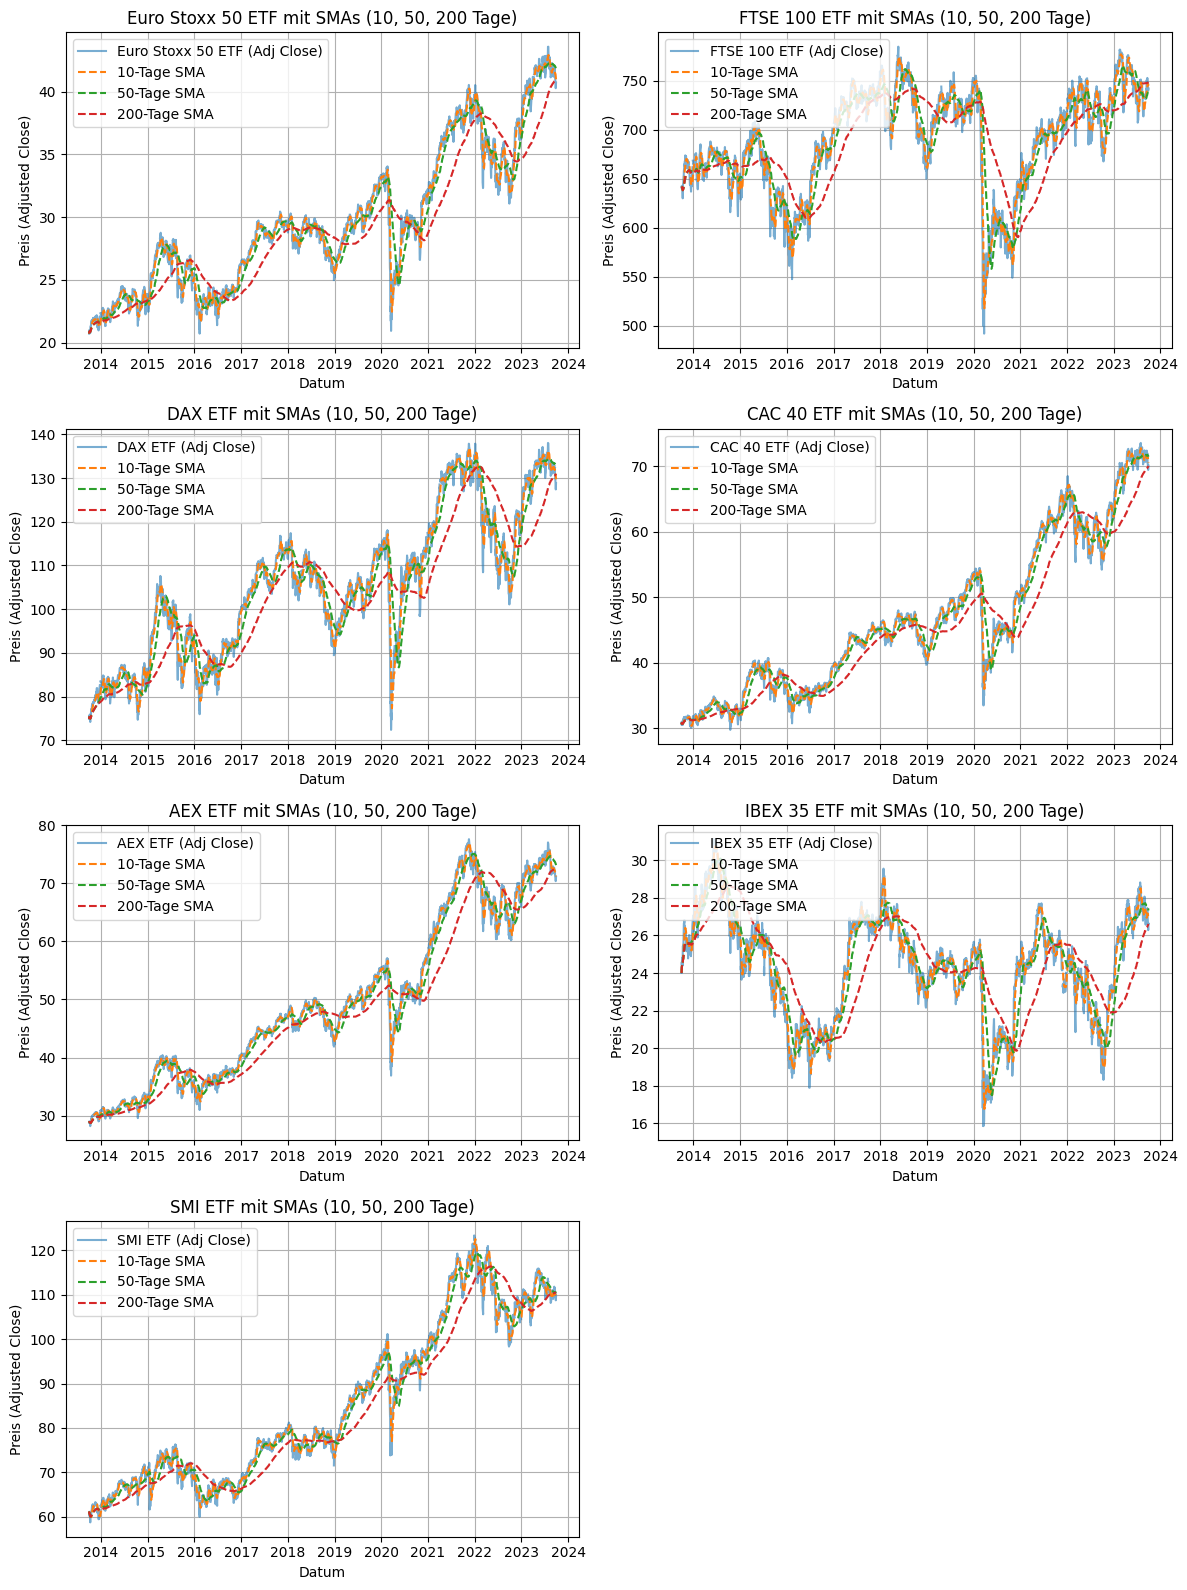

In [12]:
# Berechnung der Simple Moving Averages für 10, 50 und 200 Tage
sma_10 = index_data_etfs.rolling(window=10, min_periods=1).mean()
sma_50 = index_data_etfs.rolling(window=50, min_periods=1).mean()
sma_200 = index_data_etfs.rolling(window=200, min_periods=1).mean()

# Anzahl der ETFs und die Aufteilung auf zwei Reihen berechnen
num_etfs = len(etfs)
rows = math.ceil(num_etfs / 2)
cols = 2

# Subplots erstellen
fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))

# Falls es eine ungerade Anzahl an ETFs gibt, kann eine leere Achse erscheinen. Diese verstecken wir dann später.
axes = axes.flatten()

# Plots in den Subplots erzeugen
for idx, name in enumerate(etfs):
    axes[idx].plot(index_data_etfs[name], label=f"{name} (Adj Close)", alpha=0.6)
    axes[idx].plot(sma_10[name], label="10-Tage SMA", linestyle='--')
    axes[idx].plot(sma_50[name], label="50-Tage SMA", linestyle='--')
    axes[idx].plot(sma_200[name], label="200-Tage SMA", linestyle='--')
    axes[idx].set_title(f"{name} mit SMAs (10, 50, 200 Tage)")
    axes[idx].set_xlabel("Datum")
    axes[idx].set_ylabel("Preis (Adjusted Close)")
    axes[idx].legend(loc="upper left")
    axes[idx].grid(True)

# Falls es leere Subplots gibt, diese verstecken
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Zusammenfassen der SMAs in einem DataFrame für den Export
sma_table = pd.concat([index_data_etfs, sma_10, sma_50, sma_200], axis=1,
                      keys=['Adjusted Close', 'SMA_10', 'SMA_50', 'SMA_200'])

# Linear Weighted Moving Average

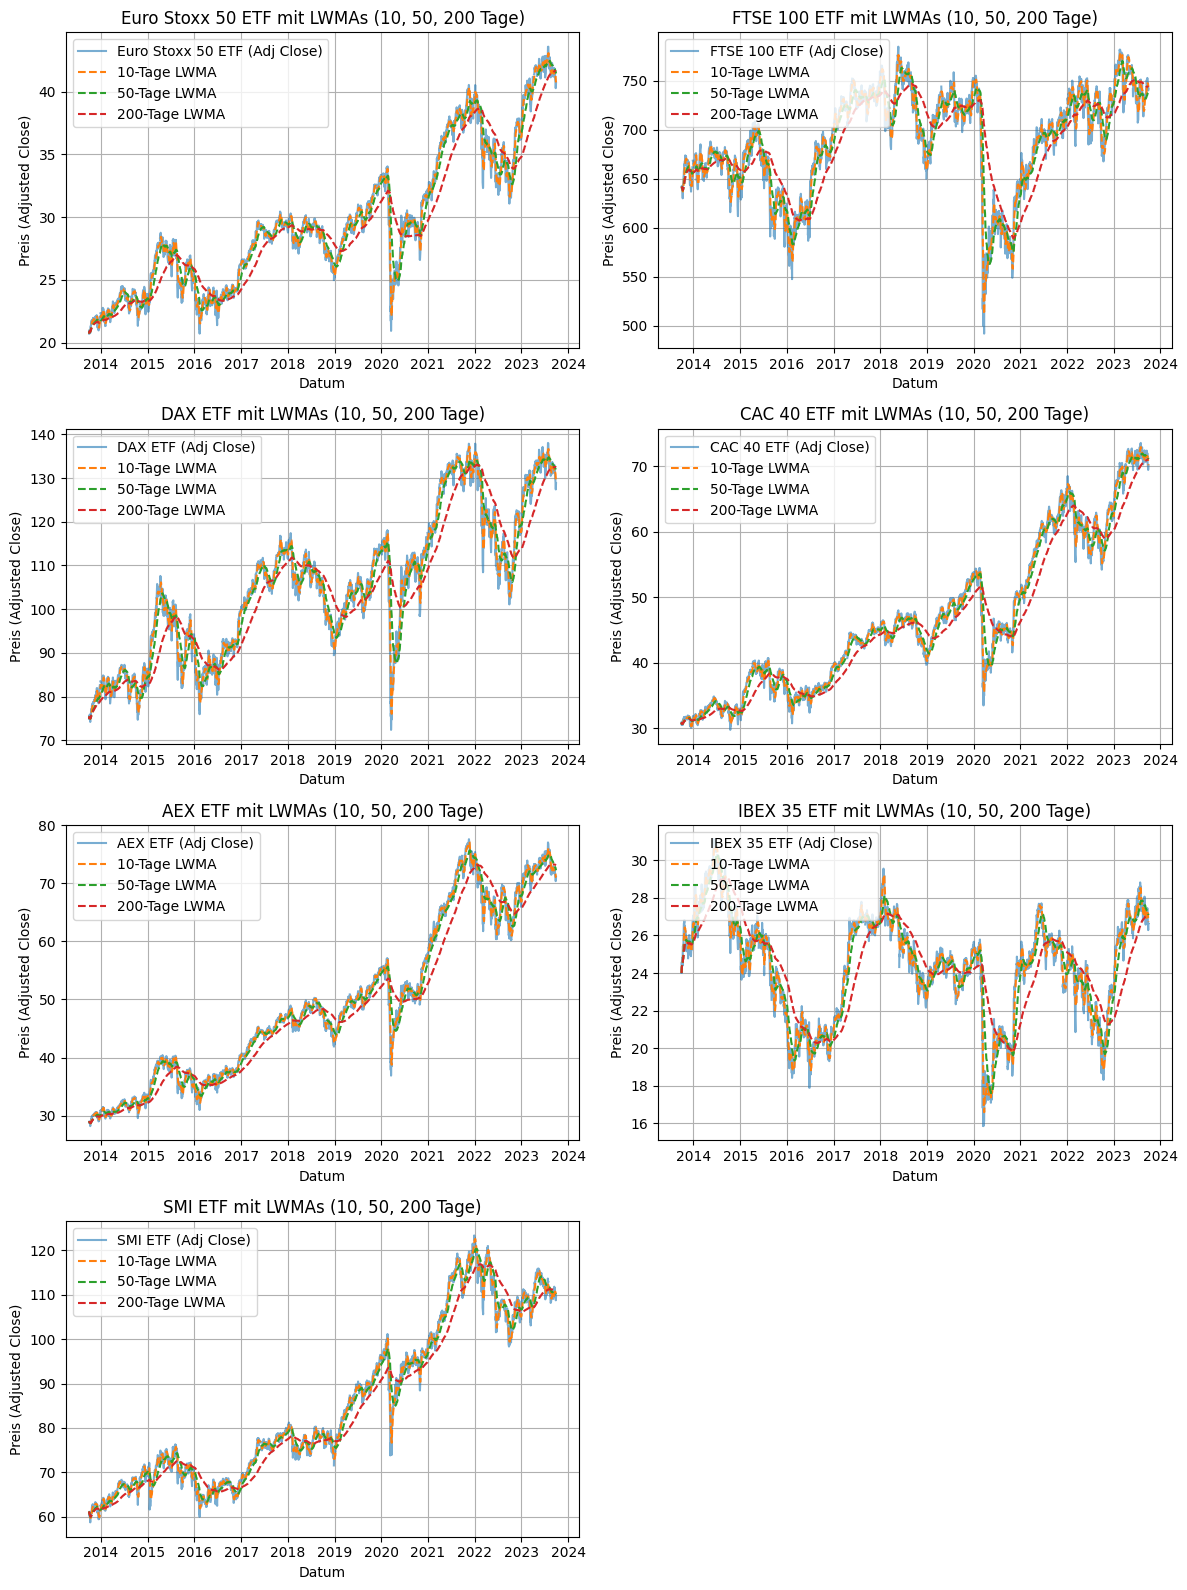

In [13]:
def lwma(data, window_size):
    """
    Berechnet den Linear Weighted Moving Average (LWMA) für eine gegebene Datenreihe und Fenstergröße.

    :param data: Pandas Series oder Liste
    :param window_size: Die Größe des Fensters für die Berechnung des LWMA
    :return: Pandas Series mit den LWMA-Werten
    """
    weights = np.arange(1, window_size + 1)
    lwma = data.rolling(window=window_size, min_periods=1).apply(
        lambda prices: np.dot(prices, weights[-len(prices):]) / weights[-len(prices):].sum(),
        raw=True
    )
    return lwma

# Berechnung der Linear Weighted Moving Averages für 10, 50 und 200 Tage
lwma_10 = lwma(index_data_etfs_int, 10)
lwma_50 = lwma(index_data_etfs_int, 50)
lwma_200 = lwma(index_data_etfs_int, 200)

# Anzahl der ETFs und die Aufteilung auf zwei Reihen berechnen
num_etfs = len(etfs)
rows = math.ceil(num_etfs / 2)
cols = 2

# Subplots erstellen
fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))

# Falls es eine ungerade Anzahl an ETFs gibt, kann eine leere Achse erscheinen. Diese verstecken wir dann später.
axes = axes.flatten()

# Plots in den Subplots erzeugen
for idx, name in enumerate(etfs):
    axes[idx].plot(index_data_etfs[name], label=f"{name} (Adj Close)", alpha=0.6)
    axes[idx].plot(lwma_10[name], label="10-Tage LWMA", linestyle='--')
    axes[idx].plot(lwma_50[name], label="50-Tage LWMA", linestyle='--')
    axes[idx].plot(lwma_200[name], label="200-Tage LWMA", linestyle='--')
    axes[idx].set_title(f"{name} mit LWMAs (10, 50, 200 Tage)")
    axes[idx].set_xlabel("Datum")
    axes[idx].set_ylabel("Preis (Adjusted Close)")
    axes[idx].legend(loc="upper left")
    axes[idx].grid(True)

# Falls es leere Subplots gibt, diese verstecken
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Zusammenfassen der LWMAs in einem DataFrame
lwma_table = pd.concat([lwma_10, lwma_50, lwma_200], axis=1, keys=['LWMA_10', 'LWMA_50', 'LWMA_200'])

# Exponential Weighted Moving Averaged

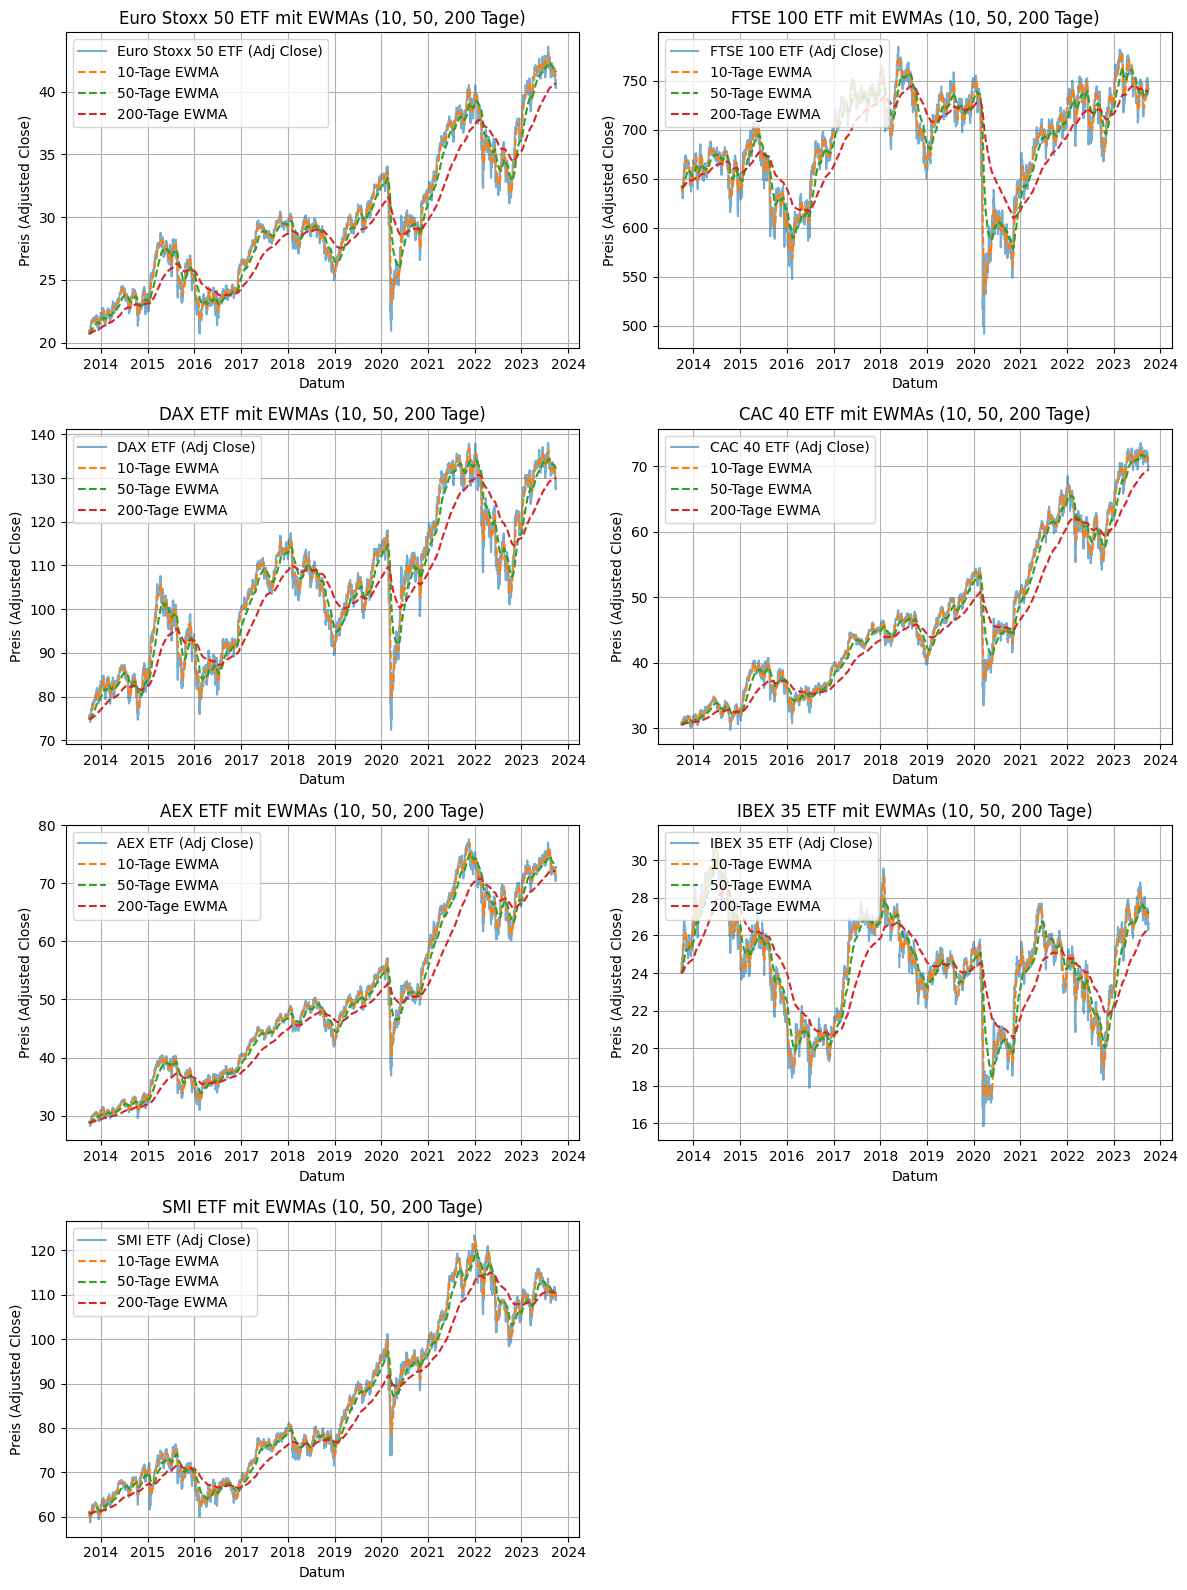

In [14]:
# Berechnung der Exponential Weighted Moving Averages für 10, 50 und 200 Tage
ewma_10 = index_data_etfs_int.ewm(span=10, adjust=False).mean()
ewma_50 = index_data_etfs_int.ewm(span=50, adjust=False).mean()
ewma_200 = index_data_etfs_int.ewm(span=200, adjust=False).mean()

# Anzahl der ETFs und die Aufteilung auf zwei Reihen berechnen
num_etfs = len(etfs)
rows = math.ceil(num_etfs / 2)
cols = 2

# Subplots erstellen
fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))

# Falls es eine ungerade Anzahl an ETFs gibt, kann eine leere Achse erscheinen. Diese verstecken wir dann später.
axes = axes.flatten()

# Plots in den Subplots erzeugen
for idx, name in enumerate(etfs):
    axes[idx].plot(index_data_etfs[name], label=f"{name} (Adj Close)", alpha=0.6)
    axes[idx].plot(ewma_10[name], label="10-Tage EWMA", linestyle='--')
    axes[idx].plot(ewma_50[name], label="50-Tage EWMA", linestyle='--')
    axes[idx].plot(ewma_200[name], label="200-Tage EWMA", linestyle='--')
    axes[idx].set_title(f"{name} mit EWMAs (10, 50, 200 Tage)")
    axes[idx].set_xlabel("Datum")
    axes[idx].set_ylabel("Preis (Adjusted Close)")
    axes[idx].legend(loc="upper left")
    axes[idx].grid(True)

# Falls es leere Subplots gibt, diese verstecken
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Zusammenfassen der EWMAs in einem DataFrame
ewma_table = pd.concat([ewma_10, ewma_50, ewma_200], axis=1, keys=['EWMA_10', 'EWMA_50', 'EWMA_200'])

# Moving Average Crossover

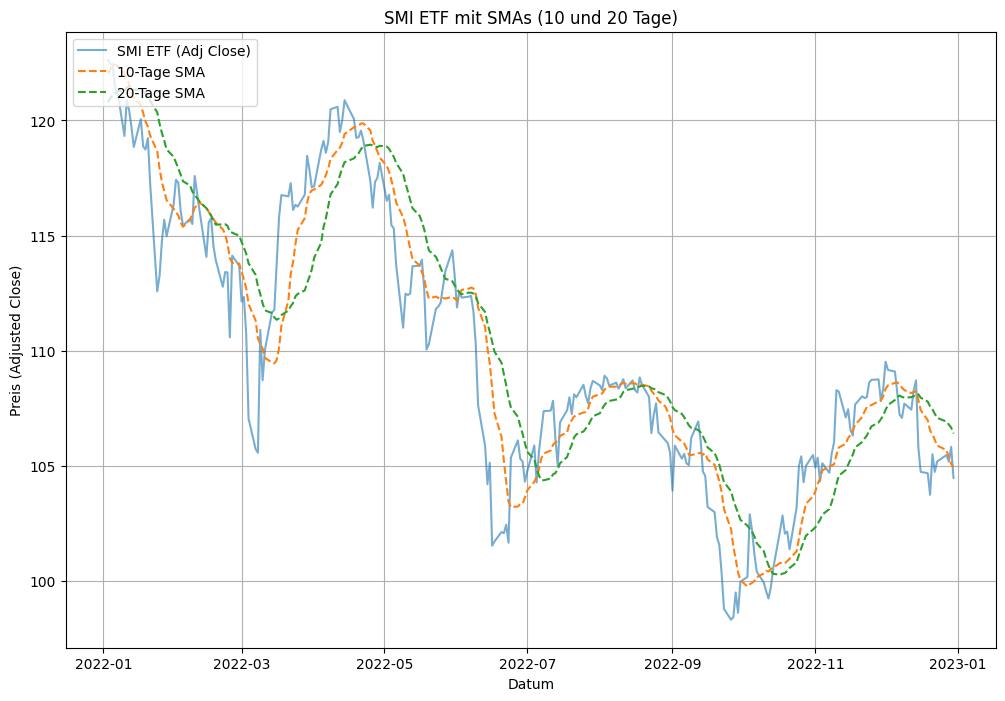

In [15]:
# Berechnung der Simple Moving Averages für 10 und 20 Tage
sma_10 = index_data_etfs_int["SMI ETF"].rolling(window=10, min_periods=1).mean()
sma_20 = index_data_etfs_int["SMI ETF"].rolling(window=20, min_periods=1).mean()

# Beispiel: Zeitraum definieren
start_date = '2022-01-01'
end_date = '2023-01-01'

plt.figure(figsize=(12, 8))
plt.plot(index_data_etfs_int["SMI ETF"].loc[start_date:end_date], label="SMI ETF (Adj Close)", alpha=0.6)
plt.plot(sma_10.loc[start_date:end_date], label="10-Tage SMA", linestyle='--')
plt.plot(sma_20.loc[start_date:end_date], label="20-Tage SMA", linestyle='--')
plt.title("SMI ETF mit SMAs (10 und 20 Tage)")
plt.xlabel("Datum")
plt.ylabel("Preis (Adjusted Close)")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


# Bollinger Bands

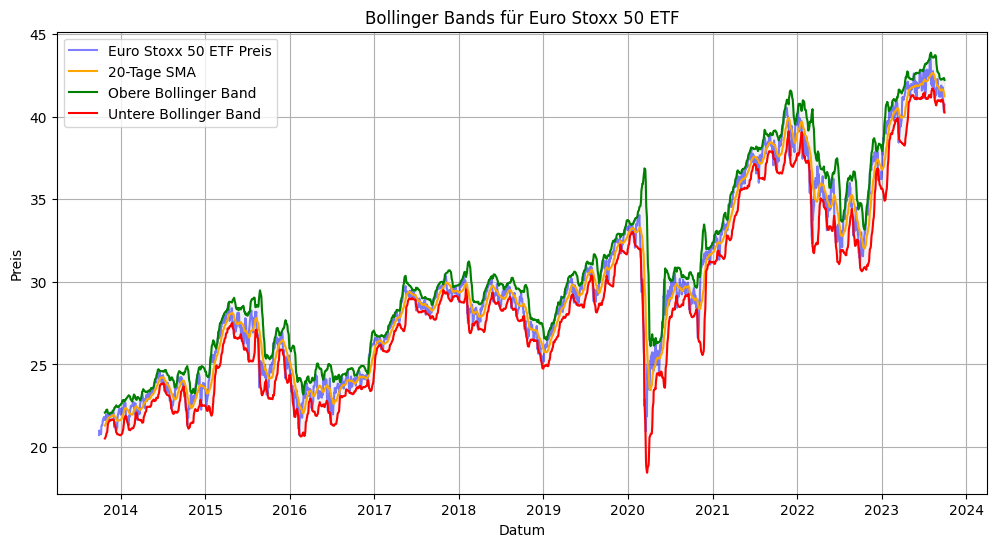

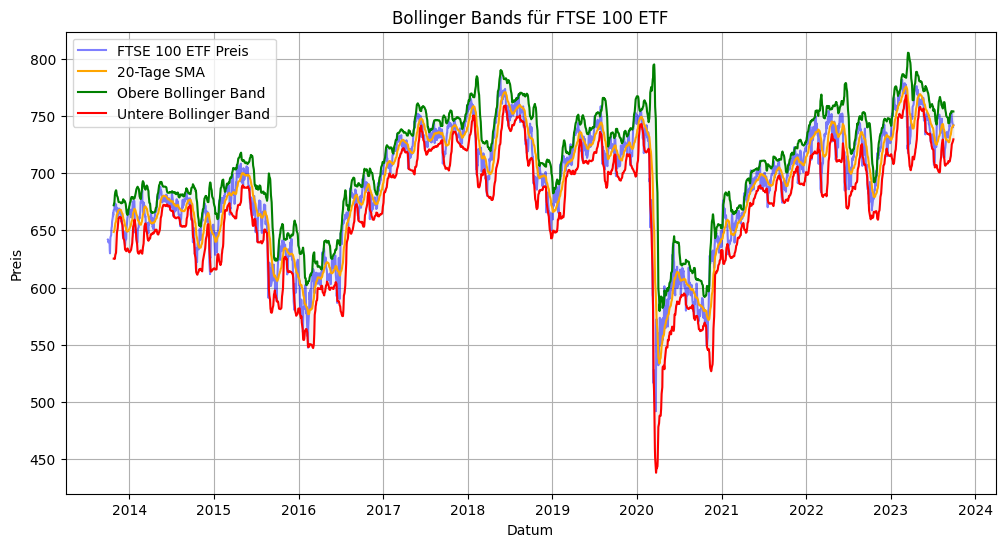

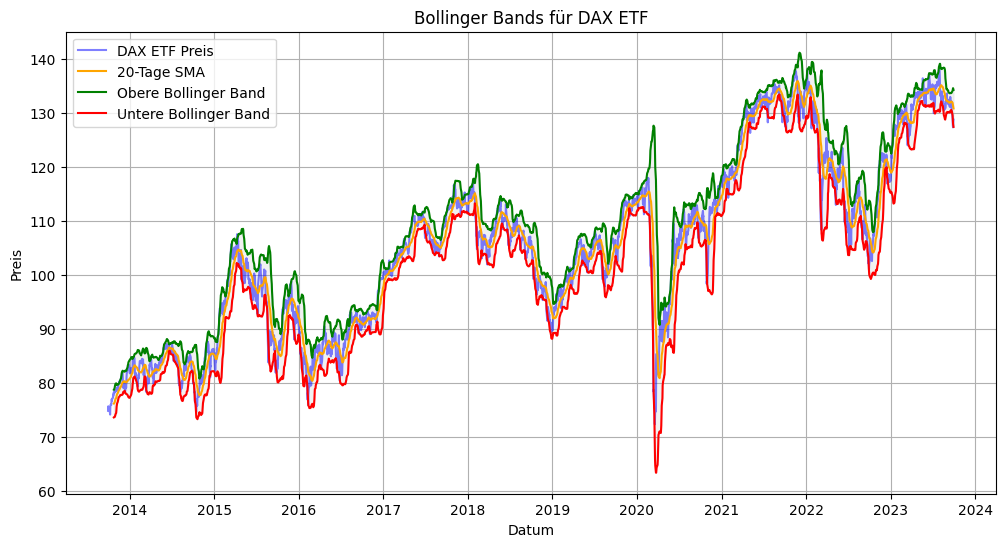

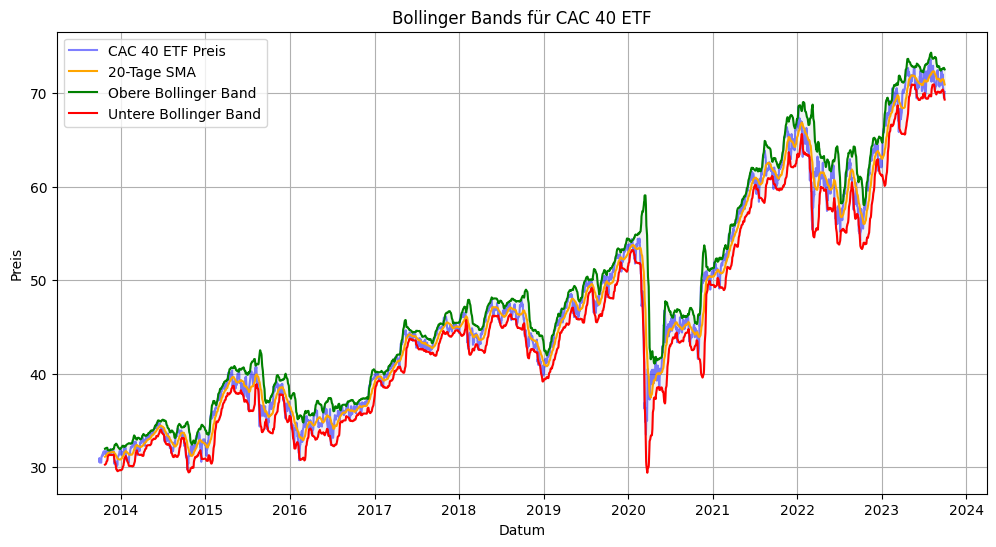

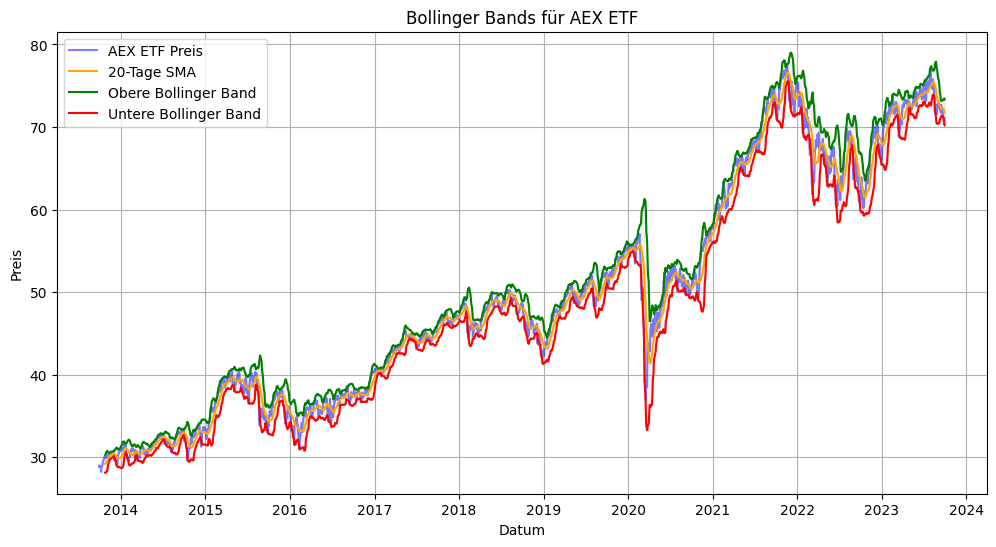

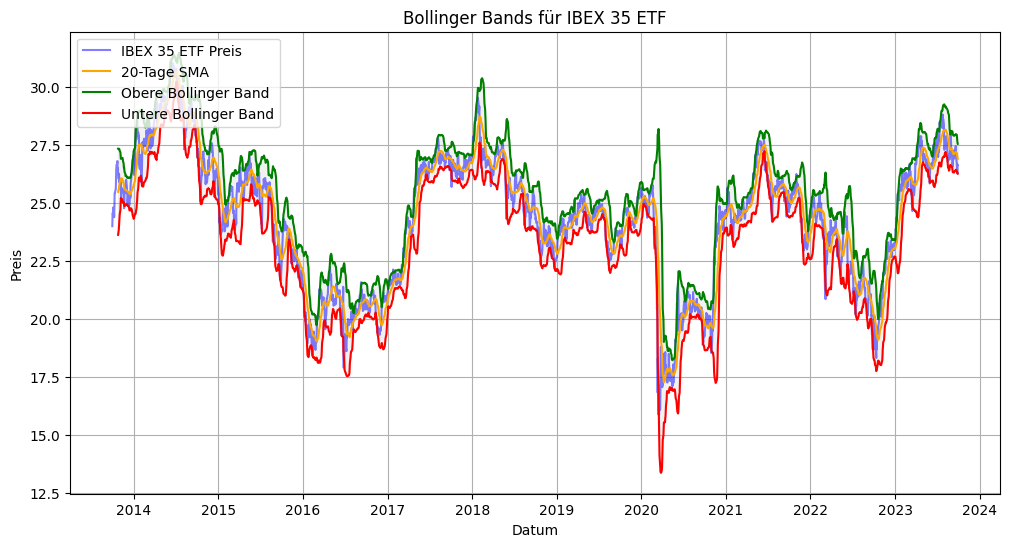

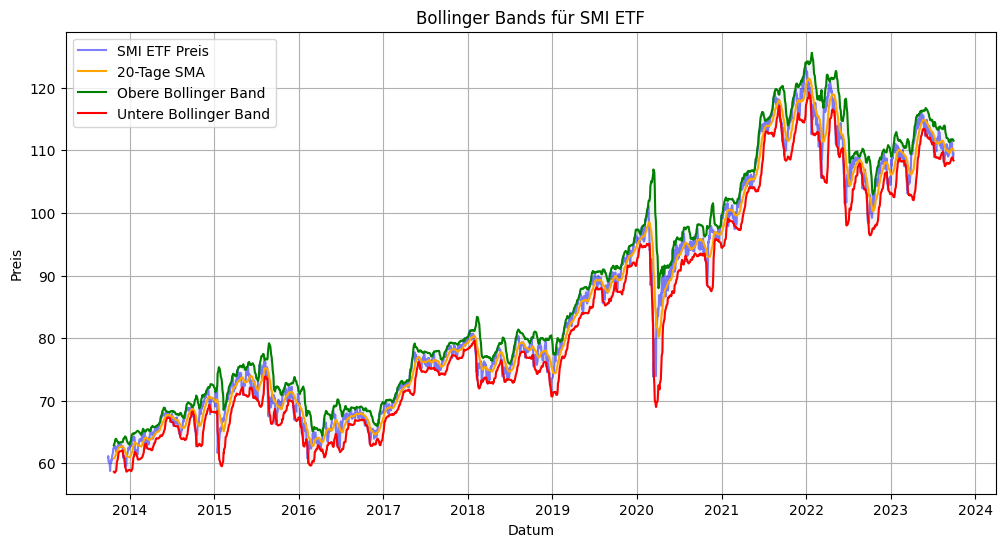

In [17]:
# Berechnung der Bollinger Bands (20 Tage) für die interpolierten Daten
bb_window = 20

for etf in index_data_etfs_int.columns:
    # 20-Tage-SMA
    sma = index_data_etfs_int[etf].rolling(window=bb_window).mean()

    # Standardabweichung (20 Tage)
    std = index_data_etfs_int[etf].rolling(window=bb_window).std()

    # Obere und untere Bollinger Bänder
    upper_band = sma + (std * 2)
    lower_band = sma - (std * 2)

    # Plot des ETFs mit den Bollinger Bändern
    plt.figure(figsize=(12, 6))
    plt.plot(index_data_etfs_int[etf], label=f'{etf} Preis', color='blue', alpha=0.5)
    plt.plot(sma, label='20-Tage SMA', color='orange')
    plt.plot(upper_band, label='Obere Bollinger Band', color='green')
    plt.plot(lower_band, label='Untere Bollinger Band', color='red')
    plt.fill_between(index_data_etfs_int.index, lower_band, upper_band, color='lightgray', alpha=0.3)
    plt.title(f'Bollinger Bands für {etf}')
    plt.xlabel('Datum')
    plt.ylabel('Preis')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()


# Momentum

            Euro Stoxx 50 ETF  FTSE 100 ETF   DAX ETF  CAC 40 ETF   AEX ETF  \
Date                                                                          
2023-09-25          -0.526165     10.478577 -2.620010   -0.661316 -1.285866   
2023-09-26          -1.092556      6.480591 -4.159996   -1.653305 -1.775826   
2023-09-27          -1.251072      1.582764 -5.019997   -1.993690 -1.697701   
2023-09-28          -0.829411      0.083618 -3.319992   -1.274010 -1.130875   
2023-09-29          -0.501720      0.883362 -2.359985   -0.758568 -0.593956   

            IBEX 35 ETF   SMI ETF  
Date                               
2023-09-25     0.096882  0.404045  
2023-09-26    -0.339077  0.076172  
2023-09-27    -0.833166 -0.848511  
2023-09-28    -0.494085 -0.636482  
2023-09-29    -0.280952 -0.289589  


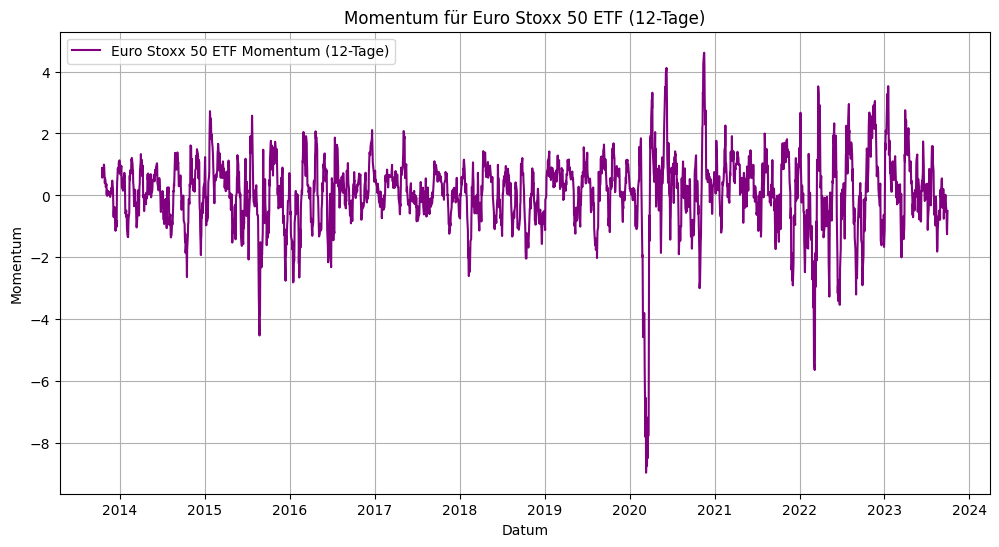

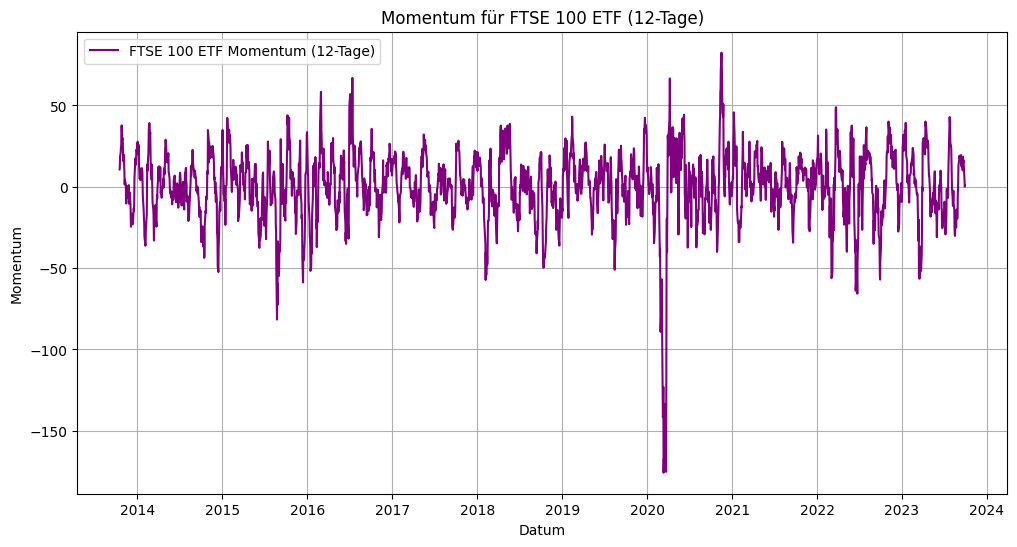

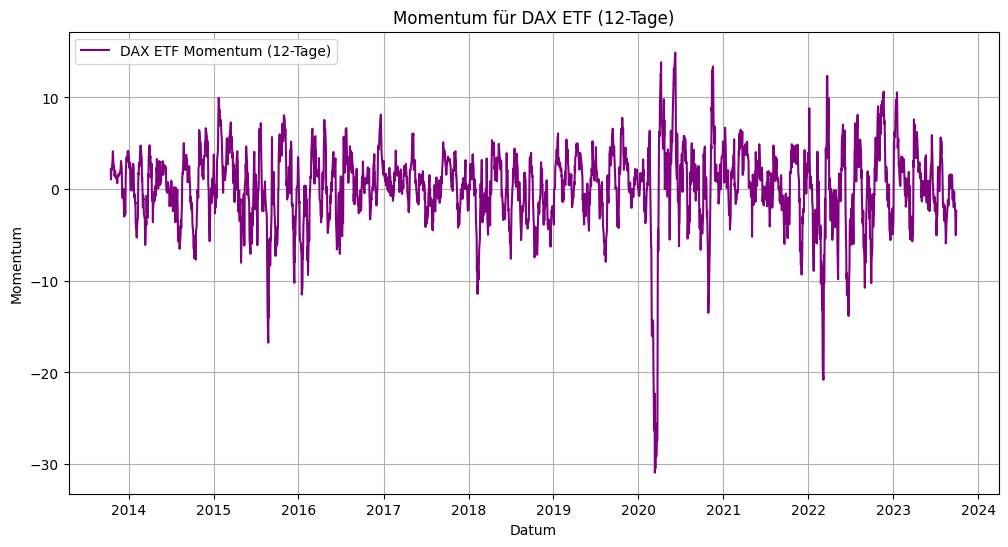

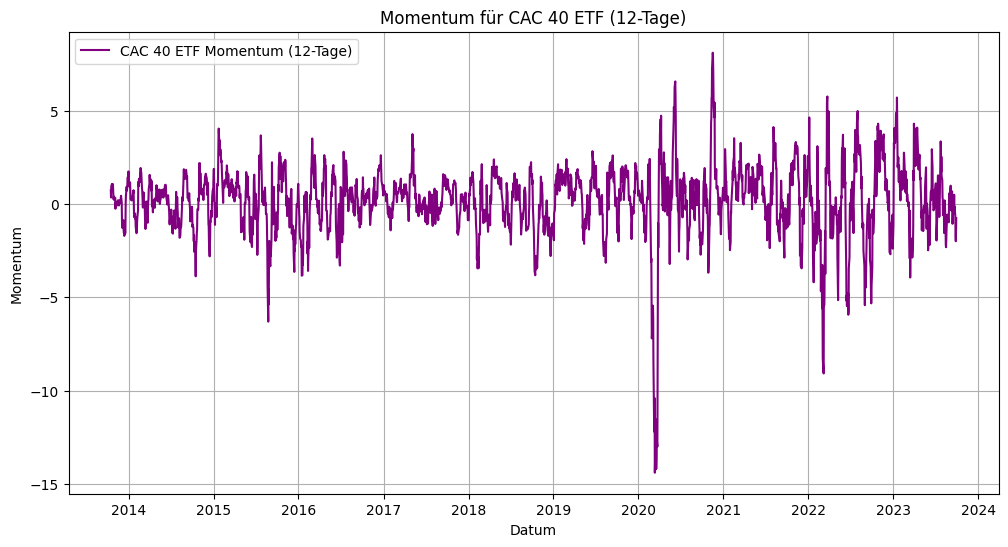

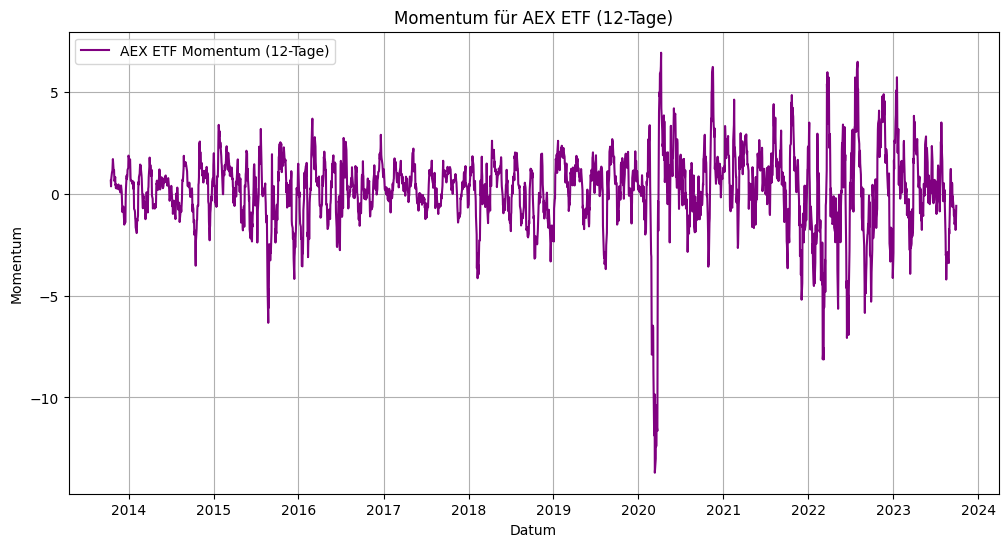

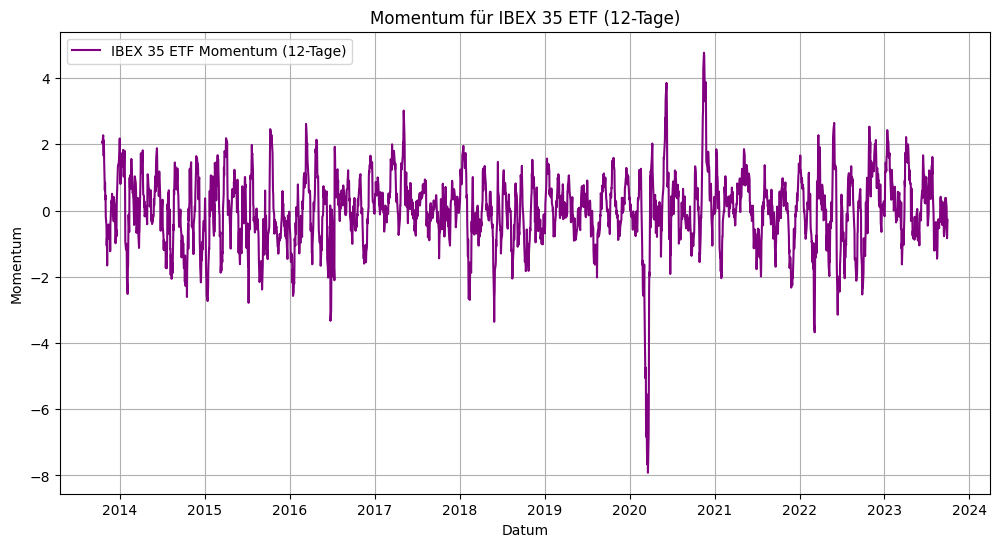

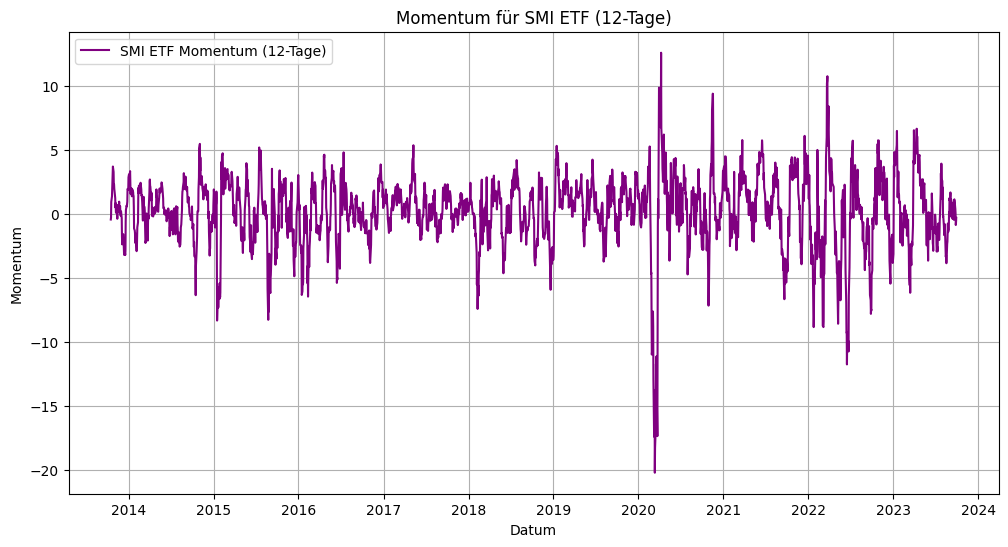

In [18]:
# Anzahl der Tage für die Momentum-Berechnung (üblicherweise 12 Tage)
momentum_window = 12

# Berechnung des Momentums für alle ETFs (Preis(t) - Preis(t-N))
momentum = index_data_etfs_int.diff(periods=momentum_window)

# Ausgabe des Momentums für die letzten Zeilen
print(momentum.tail())

# Plot des Momentums für jeden ETF
for etf in index_data_etfs_int.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(momentum[etf], label=f'{etf} Momentum ({momentum_window}-Tage)', color='purple')
    plt.title(f'Momentum für {etf} ({momentum_window}-Tage)')
    plt.xlabel('Datum')
    plt.ylabel('Momentum')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()


# Price Rate-of-Change

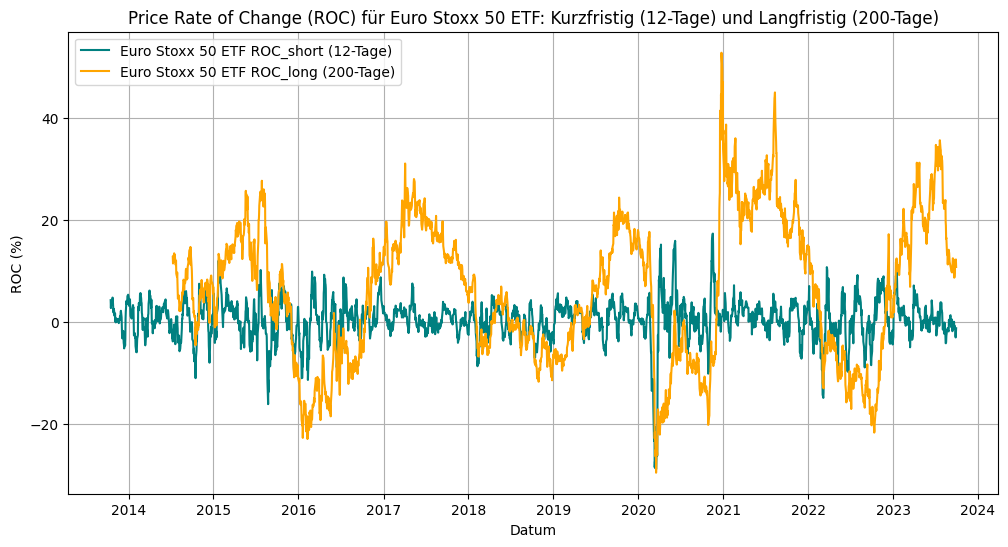

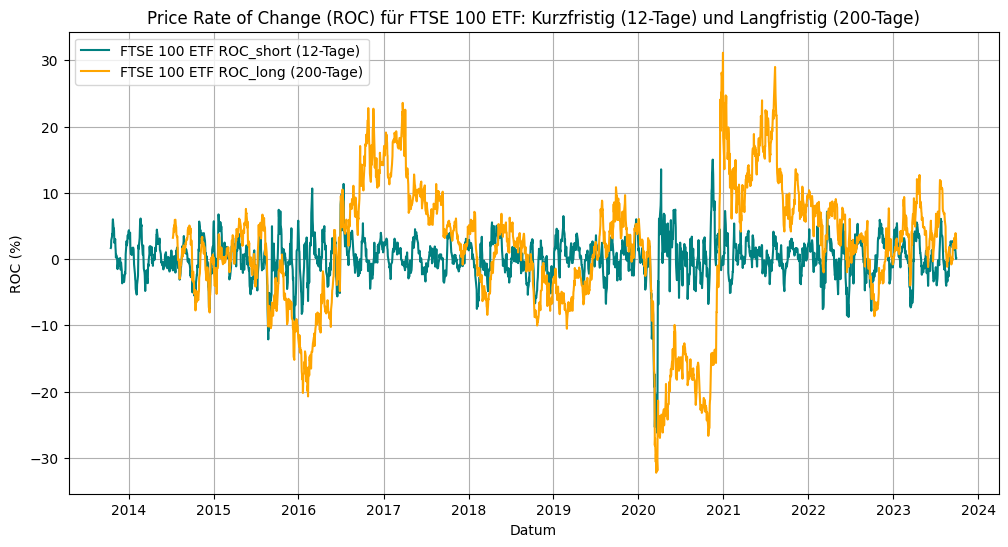

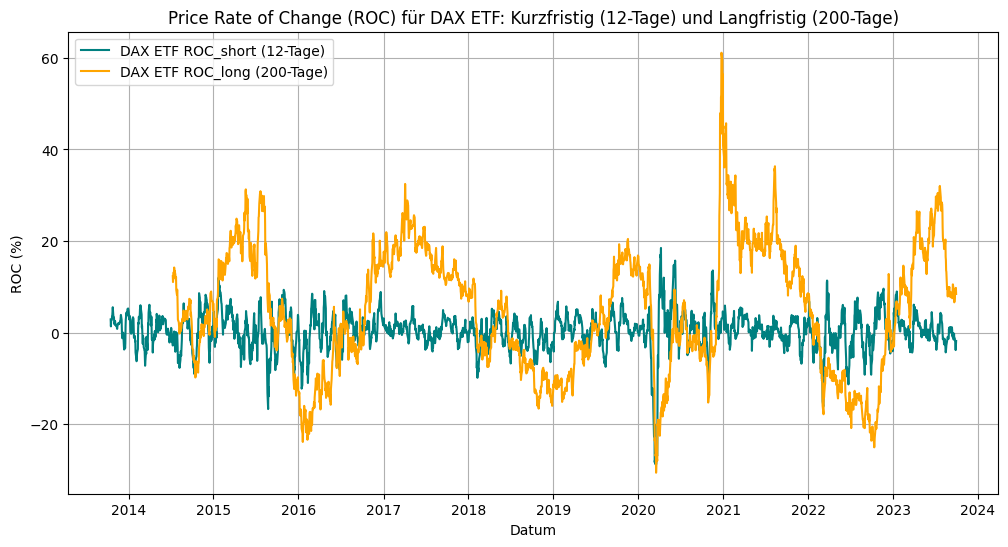

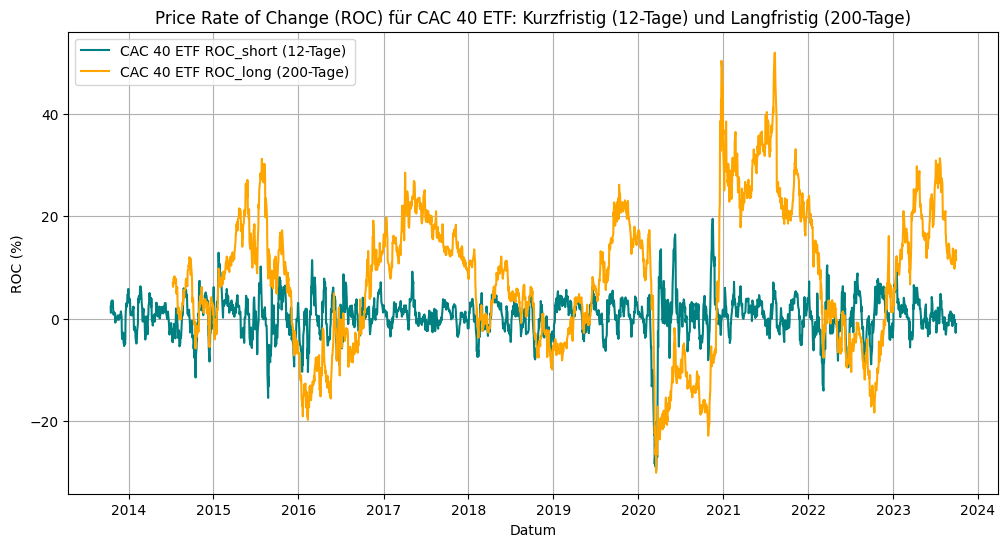

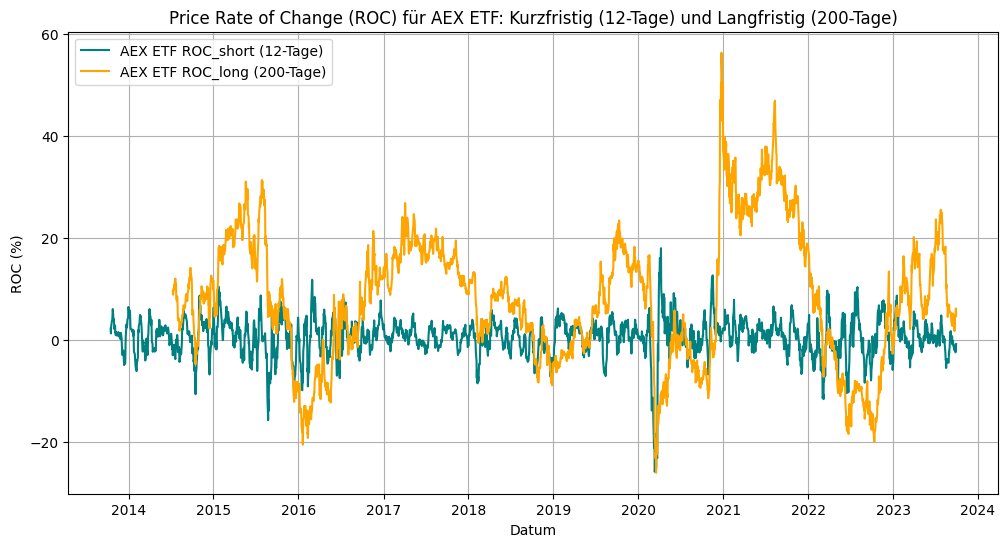

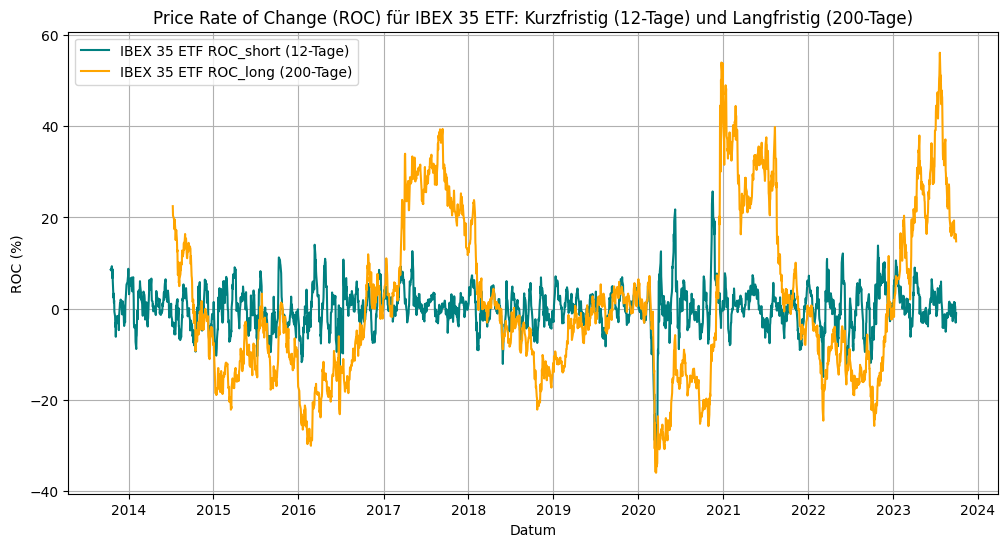

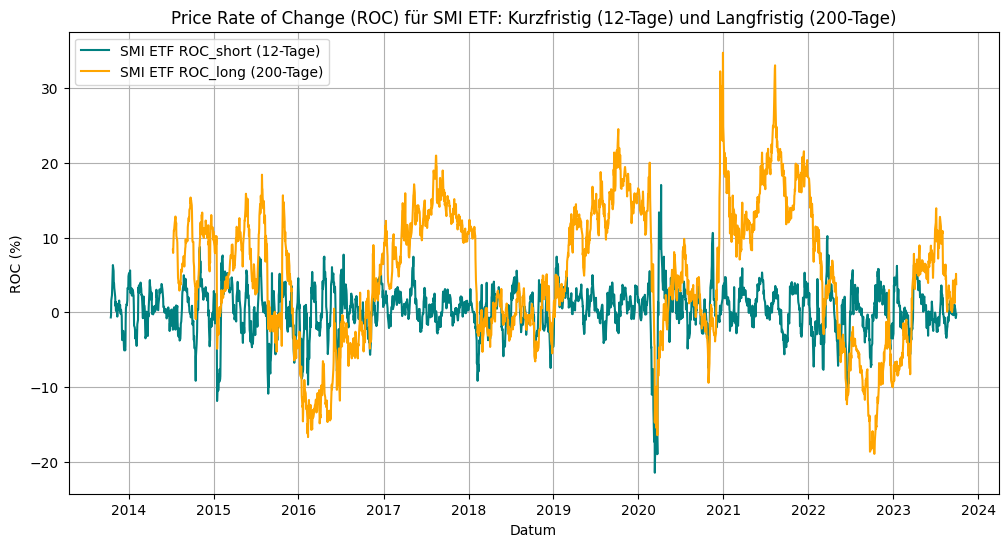

In [20]:
# Zeitfenster für die Berechnung des ROC
roc_short_window = 12  # Kurzfristig
roc_long_window = 200  # Langfristig

# Berechnung des ROC für alle ETFs (Kurzfristig und Langfristig)
roc_short = ((index_data_etfs_int / index_data_etfs_int.shift(periods=roc_short_window)) - 1) * 100
roc_long = ((index_data_etfs_int / index_data_etfs_int.shift(periods=roc_long_window)) - 1) * 100

# Plot des ROC für jeden ETF (kurzfristig und langfristig)
for etf in index_data_etfs_int.columns:
    plt.figure(figsize=(12, 6))

    # Plot ROC_short (12 Tage)
    plt.plot(roc_short[etf], label=f'{etf} ROC_short ({roc_short_window}-Tage)', color='teal')

    # Plot ROC_long (200 Tage)
    plt.plot(roc_long[etf], label=f'{etf} ROC_long ({roc_long_window}-Tage)', color='orange')

    plt.title(f'Price Rate of Change (ROC) für {etf}: Kurzfristig ({roc_short_window}-Tage) und Langfristig ({roc_long_window}-Tage)')
    plt.xlabel('Datum')
    plt.ylabel('ROC (%)')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()


# Highest Highs und Lowest Lows pro Quartal

<ipython-input-21-8d7c47120526>:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  highest_highs = index_data_etfs_int.resample('Q').max()  # Höchste Preise pro Quartal
<ipython-input-21-8d7c47120526>:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  lowest_lows = index_data_etfs_int.resample('Q').min()    # Niedrigste Preise pro Quartal


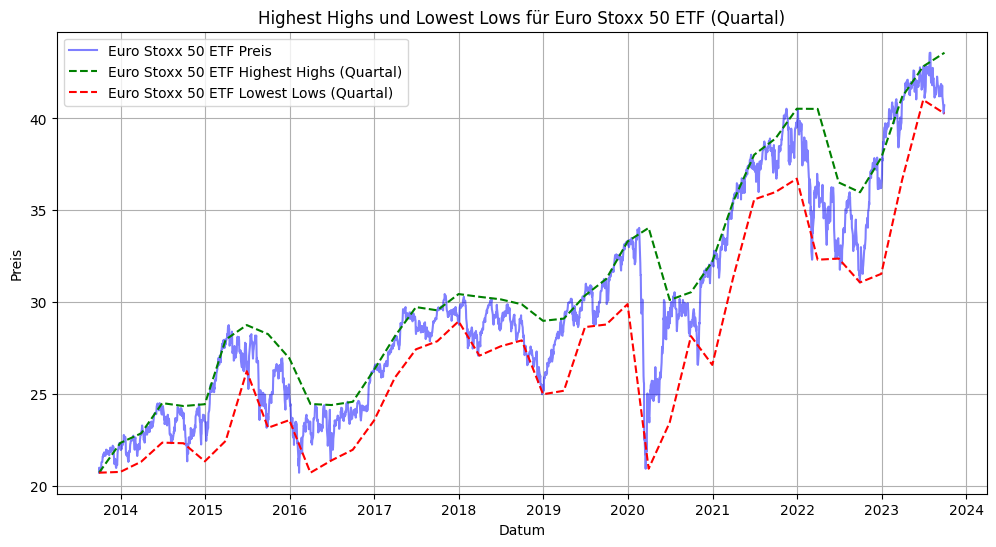

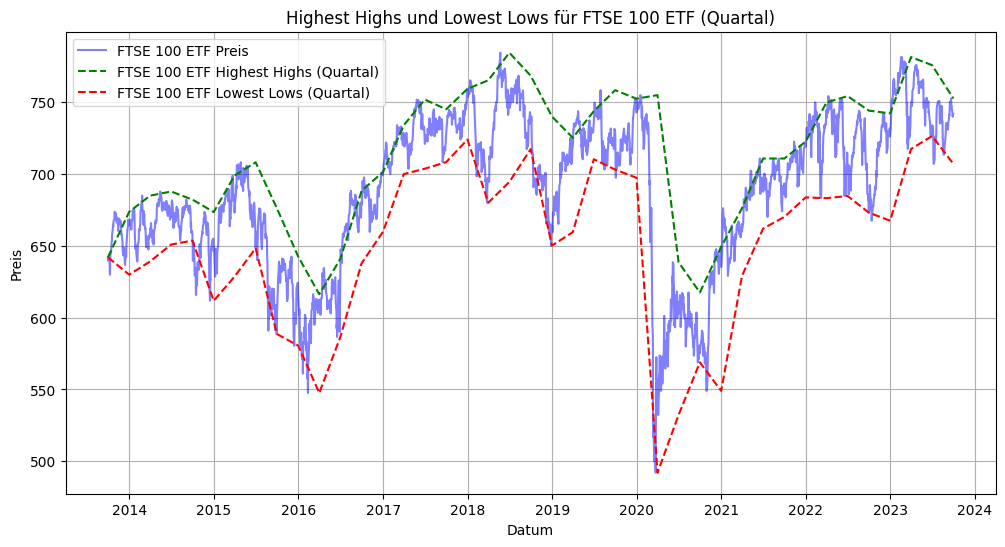

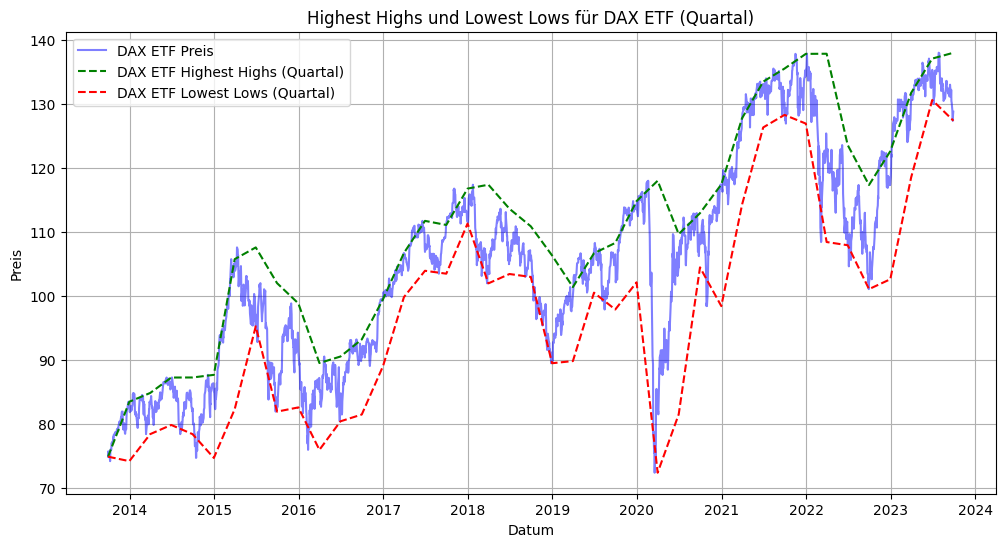

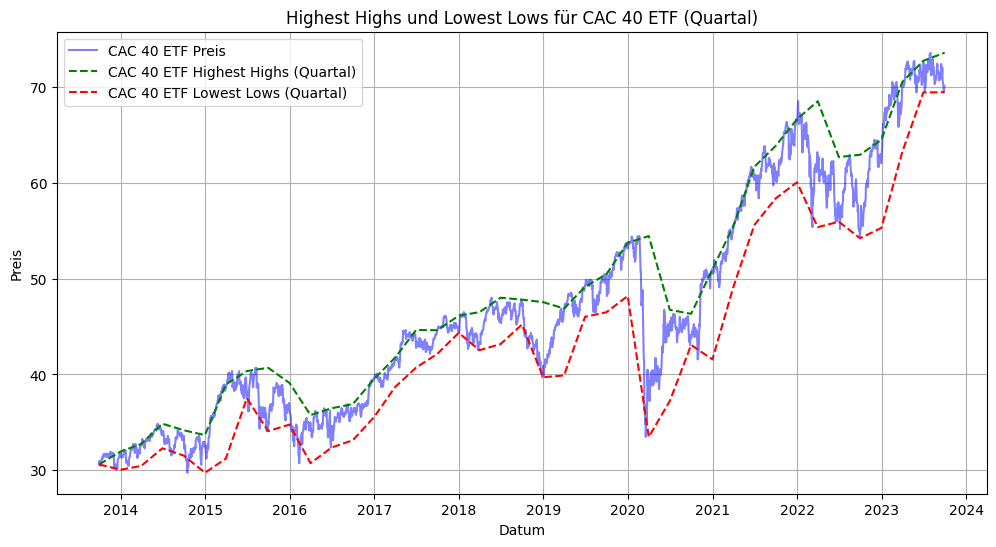

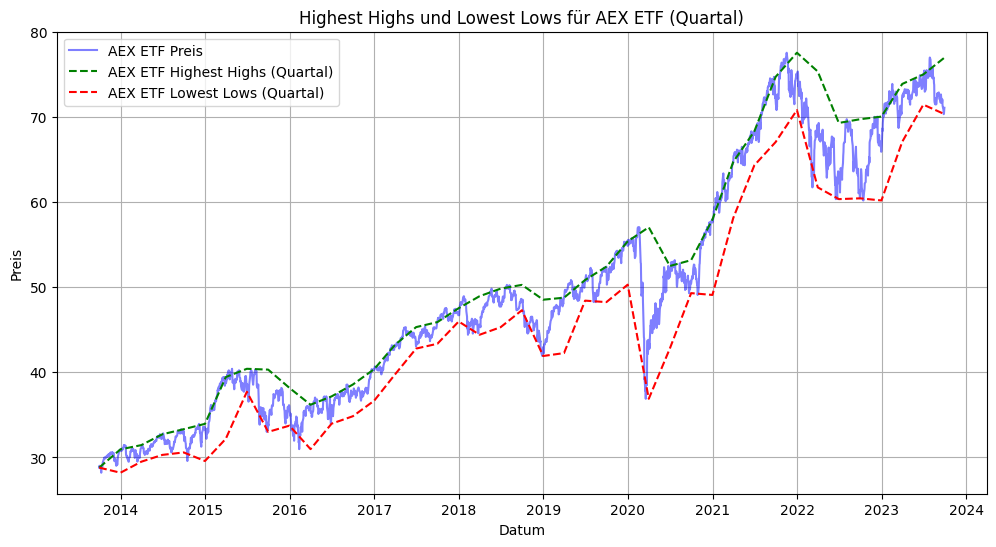

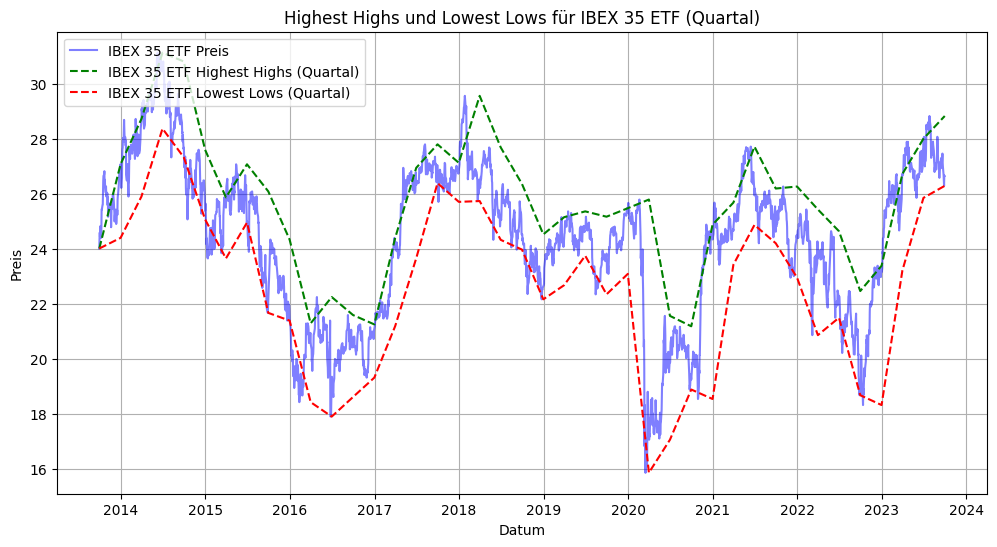

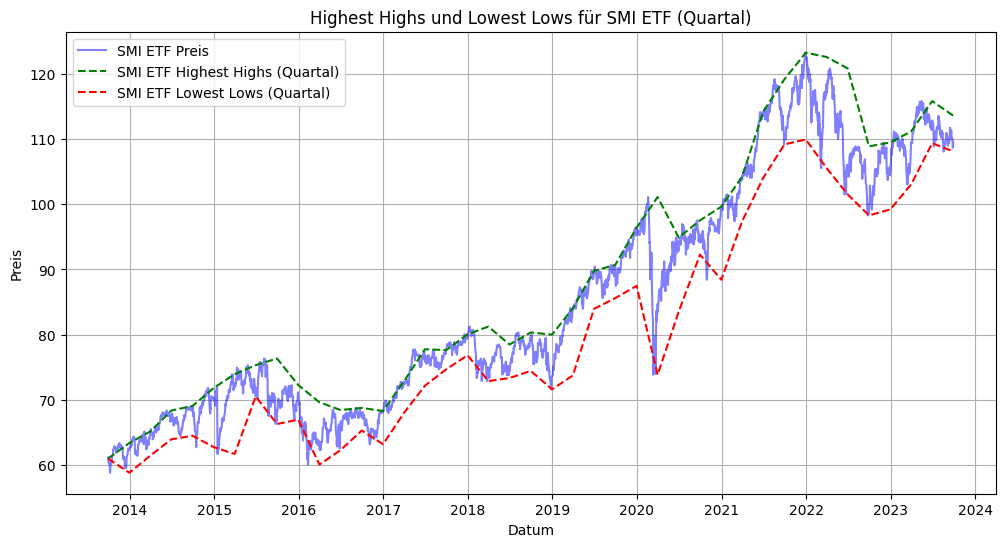

In [21]:
# Berechnung der Highest Highs und Lowest Lows für jedes Quartal
highest_highs = index_data_etfs_int.resample('Q').max()  # Höchste Preise pro Quartal
lowest_lows = index_data_etfs_int.resample('Q').min()    # Niedrigste Preise pro Quartal

# Plot der Highest Highs und Lowest Lows für jeden ETF
for etf in index_data_etfs_int.columns:
    plt.figure(figsize=(12, 6))

    # Plot der Kursdaten
    plt.plot(index_data_etfs_int[etf], label=f'{etf} Preis', color='blue', alpha=0.5)

    # Plot der Highest Highs
    plt.plot(highest_highs[etf], label=f'{etf} Highest Highs (Quartal)', color='green', linestyle='--')

    # Plot der Lowest Lows
    plt.plot(lowest_lows[etf], label=f'{etf} Lowest Lows (Quartal)', color='red', linestyle='--')

    plt.title(f'Highest Highs und Lowest Lows für {etf} (Quartal)')
    plt.xlabel('Datum')
    plt.ylabel('Preis')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()
